# Analyzing a real world data-set with SQL and Python

Connect to the database

In [1]:
%load_ext sql

In [2]:
%sql ibm_db_sa://xjv39764:***@98538591-7217-4024-b027-8baa776ffad1.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30875/bludb?security=SSL

Store the dataset in a Table

In [3]:
# import pandas
# chicago_socioeconomic_data = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
# %sql PERSIST chicago_socioeconomic_data

Problem 1: How many rows are in the dataset

In [4]:
%%sql 
select count(*) from chicago_socioeconomic_data

 * ibm_db_sa://xjv39764:***@98538591-7217-4024-b027-8baa776ffad1.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30875/bludb
Done.


1
78


Problem 2: How many community areas in Chicago have a hardship index greater than 50.0?

In [5]:
%%sql
select count(*) from chicago_socioeconomic_data
where hardship_index > 50

 * ibm_db_sa://xjv39764:***@98538591-7217-4024-b027-8baa776ffad1.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30875/bludb
Done.


1
38


Problem 3: What is the maximum value of hardship index in this dataset?

In [6]:
%%sql
select max(hardship_index) from chicago_socioeconomic_data

 * ibm_db_sa://xjv39764:***@98538591-7217-4024-b027-8baa776ffad1.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30875/bludb
Done.


1
98


Problem 4: Which community area which has the highest hardship index?

In [7]:
%%sql 
select Community_Area_name, hardship_index from chicago_socioeconomic_data
order by hardship_index desc nulls last
limit 1

 * ibm_db_sa://xjv39764:***@98538591-7217-4024-b027-8baa776ffad1.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30875/bludb
Done.


community_area_name,hardship_index
Riverdale,98


In [8]:
# %sql select community_area_name from chicago_socioeconomic_data where hardship_index = ( select max(hardship_index) from chicago_socioeconomic_data )

Problem 5: Which Chicago community areas have per-capita incomes greater than $60,000?

In [9]:
%%sql 
select Community_Area_name, per_capita_income from chicago_socioeconomic_data
where per_capita_income>60000

 * ibm_db_sa://xjv39764:***@98538591-7217-4024-b027-8baa776ffad1.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30875/bludb
Done.


community_area_name,per_capita_income
Lake View,60058
Lincoln Park,71551
Near North Side,88669
Loop,65526


Problem 6: Create a scatter plot using the variables per_capita_income_ and hardship_index. Explain the correlation between the two variables.

 * ibm_db_sa://xjv39764:***@98538591-7217-4024-b027-8baa776ffad1.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30875/bludb
Done.
 * ibm_db_sa://xjv39764:***@98538591-7217-4024-b027-8baa776ffad1.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud:30875/bludb
Done.


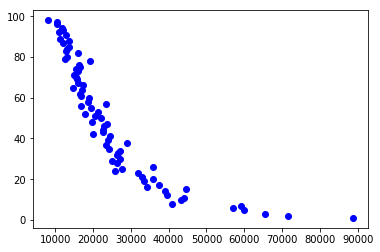

In [12]:
import matplotlib.pyplot as plt

per_capita_income = %sql select per_capita_income from chicago_socioeconomic_data
hardship_index = %sql select hardship_index from chicago_socioeconomic_data


plt.scatter(per_capita_income, hardship_index, c ="blue")
 
# To show the plot
plt.show()

In [11]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# import seaborn as sns

# income_vs_hardship = %sql select per_capita_income, hardship_index from chicago_socioeconomic_data;
# plot = sns.jointplot(x='per_capita_income',y='hardship_index', data=income_vs_hardship.DataFrame())